C:\Users\dshah\AppData\Local\Temp\ipykernel_10420\3727644584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loss_percentage'] = pd.to_numeric(data['loss_percentage'], errors='coerce')
C:\Users\dshah\AppData\Local\Temp\ipykernel_10420\3727644584.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loss_quantity'] = pd.to_numeric(data['loss_quantity'], errors='coerce')


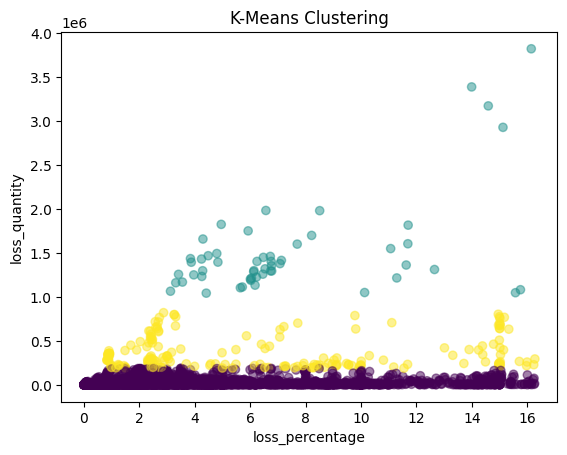

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def clean_data(data):
    data = data.dropna(subset=['loss_percentage', 'loss_quantity'])
    data['loss_percentage'] = pd.to_numeric(data['loss_percentage'], errors='coerce')
    data['loss_quantity'] = pd.to_numeric(data['loss_quantity'], errors='coerce')
    data = data.drop_duplicates()
    return data

def perform_clustering(data, feature_columns, n_clusters=3):
    """
    Perform K-means clustering on the given feature columns.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data[feature_columns])
    data['Cluster'] = kmeans.labels_
    return kmeans, data

def plot_clusters(data, x_column, y_column):
    """
    Plot the clusters.
    """
    plt.scatter(data[x_column], data[y_column], c=data['Cluster'], cmap='viridis', alpha=0.5)
    plt.title("K-Means Clustering")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

if __name__ == "__main__":
    data = pd.read_csv(r"C:\Users\dshah\OneDrive\Documents/cleaned_FAO_food_loss.csv")
    cleaned_data = clean_data(data)
    kmeans, clustered_data = perform_clustering(cleaned_data, ['loss_percentage', 'loss_quantity'])
    plot_clusters(clustered_data, 'loss_percentage', 'loss_quantity')
